In [264]:
import numpy as np
import pandas as pd
import random
from random import randint

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

https://archive.ics.uci.edu/ml/datasets/student+performance

In [296]:
math_df = pd.read_csv("/home/isaac/Fundamentals_of_Data_Science_Certificate/Extra Python work/Student Marks/student-mat.csv", sep=';')

port_df = pd.read_csv("/home/isaac/Fundamentals_of_Data_Science_Certificate/Extra Python work/Student Marks/student-por.csv", sep=';')

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

# These grades are related with the course subject, Math or Portuguese: 

31 G1 - first period grade (numeric: from 0 to 20) 

31 G2 - second period grade (numeric: from 0 to 20) 

32 G3 - final grade (numeric: from 0 to 20, output target)

In [297]:
math_df["Math"] = "Math"
port_df["Portuguese"] = "Portuguese"

In [298]:
math_df.shape

(395, 34)

In [299]:
math_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [300]:
port_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Portuguese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


In [301]:
math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [302]:
port_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [303]:
frames = [math_df, port_df]
master_df = pd.concat(frames)

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [304]:
master_df.shape

(1044, 35)

In [305]:
master_df = master_df.drop(["Math", "Portuguese", "sex", "age", "Dalc", "reason", "guardian", "G1", "G2", "G3"], axis = 1)

In [306]:
# Let's add such variables 

# Learner Type

learner_type = ["adult", "child", "youth", "elderly", "teachers"]

# Target Populations

target_population = ["rural", "disabled", "indigenous", "minority", "newcomers"]

#

list_of_learner_types = []
list_of_target_population = []

for i in range(1044):
    index_learner_type = randint(0, len(learner_type) - 1)
    list_of_learner_types.append(learner_type[index_learner_type])
    
for i in range(1044):
    index_target_population = randint(0, len(target_population) - 1)
    list_of_target_population.append(target_population[index_target_population])

In [307]:
master_df["learner_type"] = list_of_learner_types
master_df["target_population"] = list_of_target_population

In [308]:
master_df.head(5)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,internet,nursery,paid,romantic,school,schoolsup,studytime,traveltime,learner_type,target_population
0,4,teacher,4,at_home,A,1,6,no,U,0,...,no,yes,no,no,GP,yes,2,2,teachers,indigenous
1,1,other,1,at_home,T,1,4,no,U,0,...,yes,no,no,no,GP,no,2,1,adult,indigenous
2,1,other,1,at_home,T,3,10,no,U,3,...,yes,yes,yes,no,GP,yes,2,1,youth,newcomers
3,2,services,4,health,T,1,2,yes,U,0,...,yes,yes,yes,yes,GP,no,3,1,teachers,indigenous
4,3,other,3,other,T,2,4,no,U,0,...,no,yes,yes,no,GP,no,2,1,elderly,disabled


In [309]:
list(master_df.groupby(['learner_type']).size())

[217, 211, 208, 214, 194]

In [310]:
master_df.groupby(['target_population']).size()

target_population
disabled      202
indigenous    217
minority      214
newcomers     211
rural         200
dtype: int64

In [311]:
master_df = master_df.sort_values('learner_type')

In [312]:
master_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,internet,nursery,paid,romantic,school,schoolsup,studytime,traveltime,learner_type,target_population
648,2,other,3,services,T,4,4,no,R,0,...,yes,no,no,no,MS,no,1,3,adult,rural
234,1,services,2,at_home,T,2,0,yes,R,0,...,yes,yes,no,no,GP,no,2,2,adult,rural
231,3,health,3,services,T,4,10,no,U,0,...,yes,yes,no,no,GP,no,2,1,adult,newcomers
228,4,other,4,services,T,2,6,no,R,0,...,no,yes,no,no,GP,no,1,1,adult,rural
225,4,other,4,services,T,5,15,no,U,0,...,yes,yes,no,yes,GP,no,2,1,adult,disabled
223,3,other,4,teacher,T,1,0,yes,R,0,...,yes,yes,no,yes,GP,no,3,2,adult,minority
221,3,other,4,teacher,T,1,4,yes,U,0,...,yes,yes,no,yes,GP,no,2,1,adult,minority
219,4,services,3,at_home,T,4,14,no,U,1,...,yes,yes,yes,yes,GP,no,3,1,adult,disabled
212,2,other,2,other,A,1,0,no,U,0,...,yes,yes,yes,no,GP,yes,2,1,adult,newcomers
214,4,other,4,services,T,2,12,no,R,0,...,no,yes,yes,no,GP,no,1,1,adult,rural


Add 3 quizzes (10% each), 3 assignments (10% each), and a final presentation (40%) each. Each of the above is out 20 for the sake of the argument and the graph below.

In [315]:
quiz_1 = [randint(0, 20) for i in range(master_df.shape[0])]
quiz_2 = [randint(0, 20) for i in range(master_df.shape[0])]
quiz_3 = [randint(0, 20) for i in range(master_df.shape[0])]

assignment_1 = [randint(0, 20) for i in range(master_df.shape[0])]
assignment_2 = [randint(0, 20) for i in range(master_df.shape[0])]
assignment_3 = [randint(0, 20) for i in range(master_df.shape[0])]

project = [randint(0, 20) for i in range(master_df.shape[0])]

In [316]:
master_df["quiz_1"] = quiz_1
master_df["quiz_2"] = quiz_2
master_df["quiz_3"] = quiz_3

master_df["assignment_1"] = assignment_1
master_df["assignment_2"] = assignment_2
master_df["assignment_3"] = assignment_3

master_df["project"] = project

In [317]:
master_df["final_mark"] = 0.1 * master_df["quiz_1"] + 0.1 * master_df["quiz_2"] + 0.1 * master_df["quiz_3"] + 0.1 * master_df["assignment_1"] + 0.1 * master_df["assignment_2"] + 0.1 * master_df["assignment_3"] + 0.4 * master_df["project"]

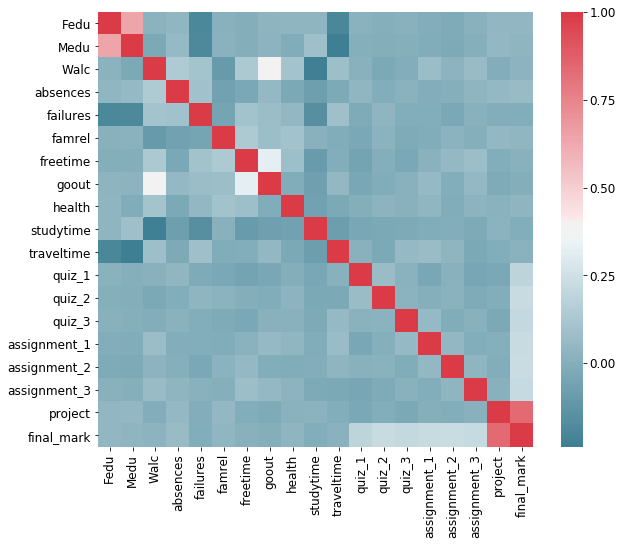

In [319]:
f, ax = plt.subplots(figsize=(10, 8))
corr = master_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<function matplotlib.pyplot.show>

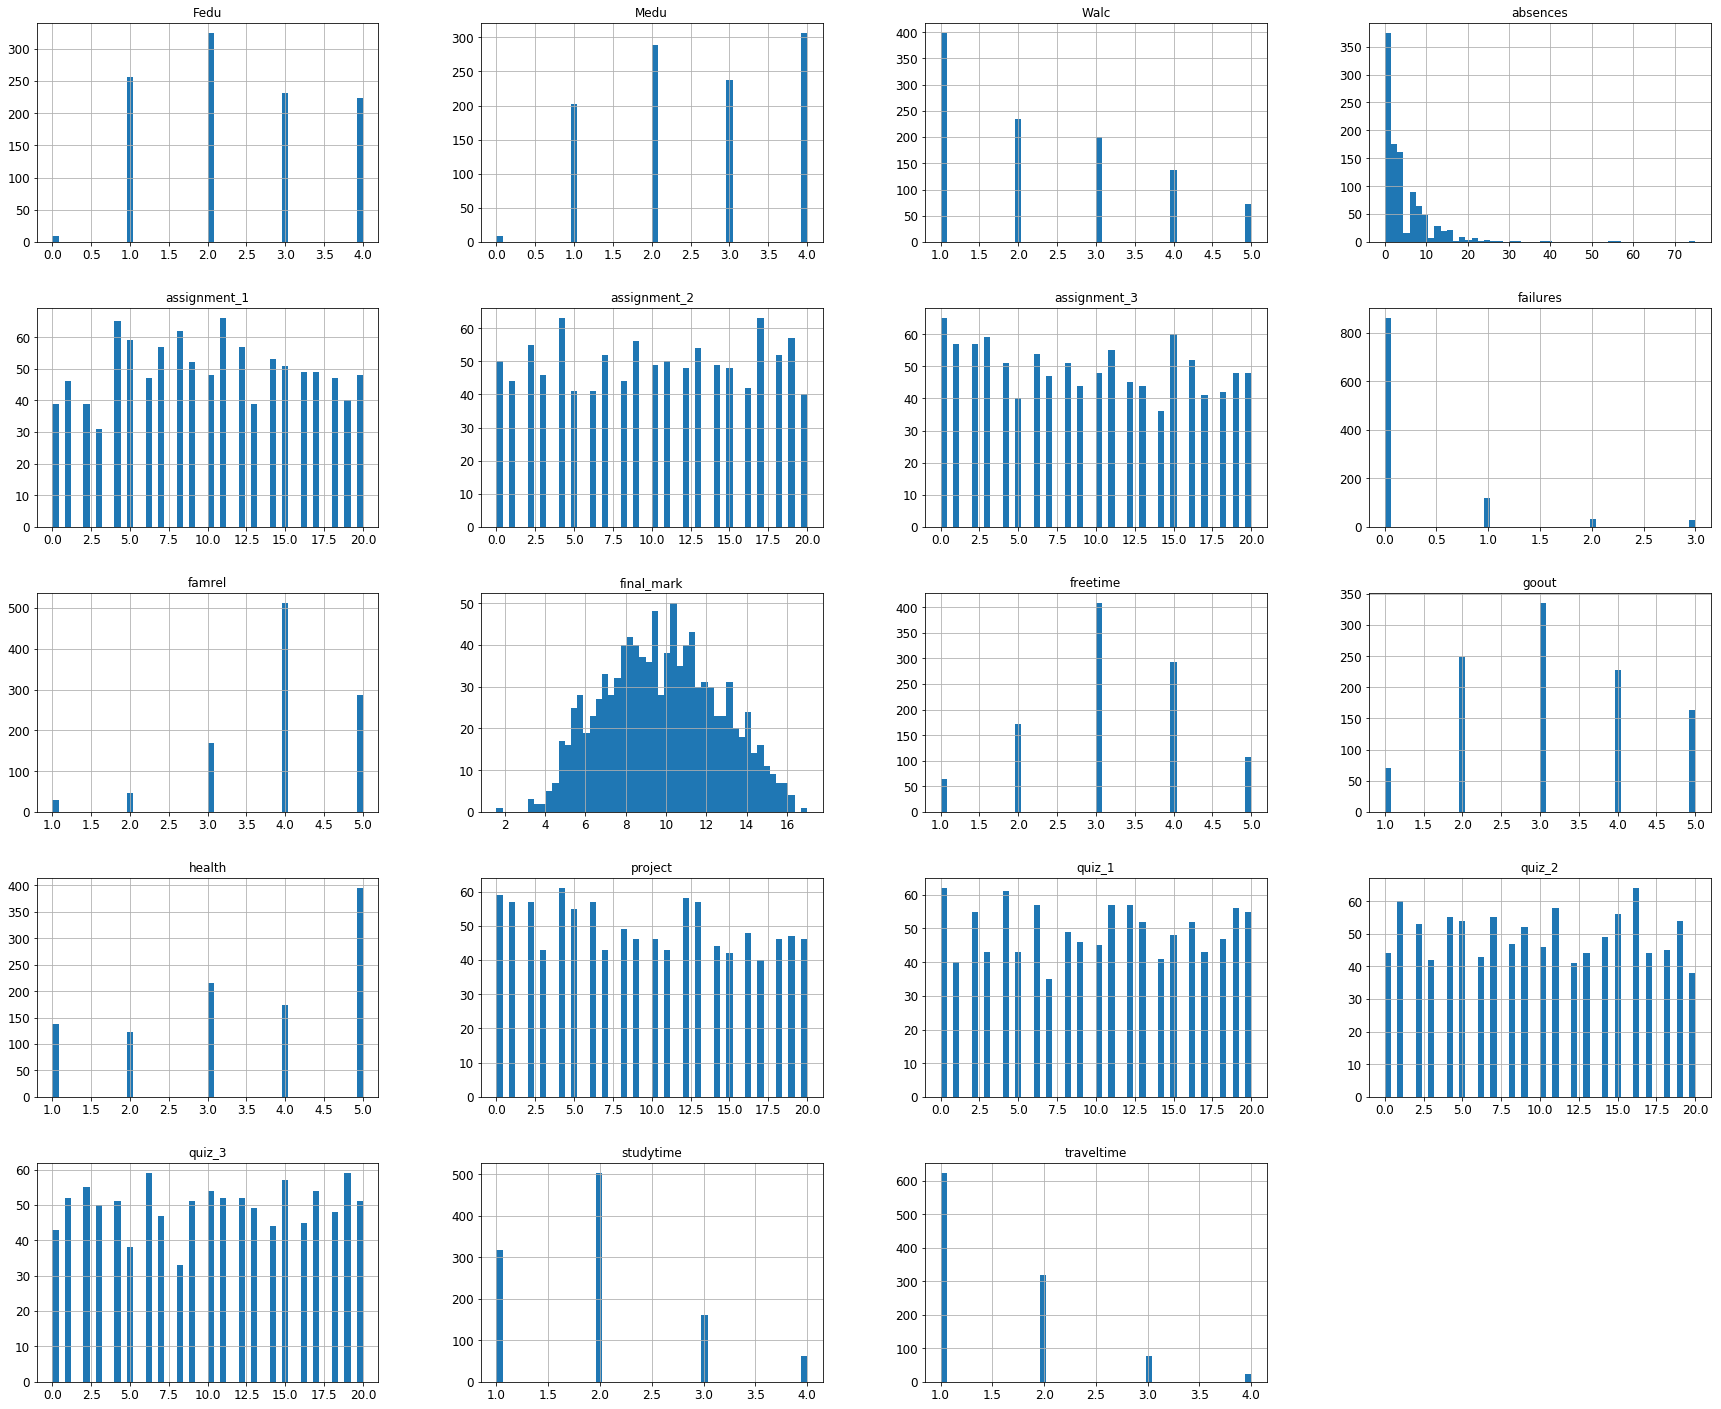

In [320]:
master_df.hist(bins = 50, figsize = (30, 25))
plt.show

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64cdbd9e10>,
      dtype=object)

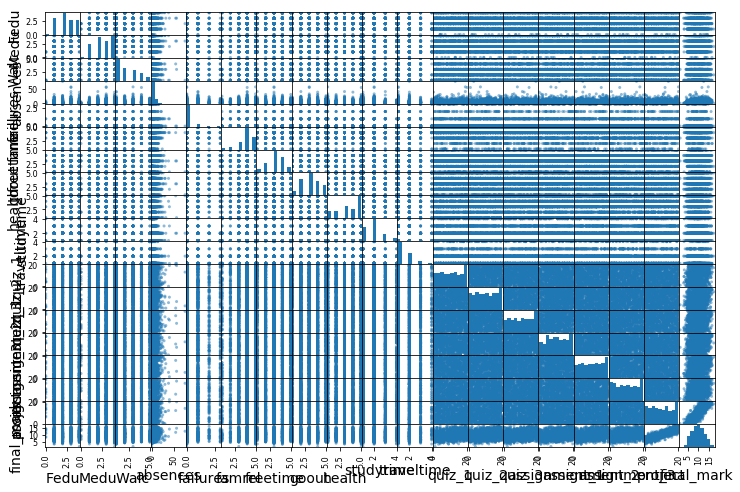

In [321]:
from pandas.tools.plotting import scatter_matrix
#attributes = ["median_house_value", "median_income", "total_rooms",
#"housing_median_age"]
scatter_matrix(master_df, figsize=(12, 8))

https://codeburst.io/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e

Divide and conquer

In [322]:
# Children

children_df = master_df[master_df.learner_type == 'child']


In [323]:
children_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
642,3,other,4,teacher,T,1,0,no,U,0,...,child,indigenous,2,16,2,6,4,19,14,10.5
372,2,at_home,2,other,T,1,8,yes,U,0,...,child,indigenous,13,16,4,5,20,15,1,7.7
639,1,services,1,other,T,3,0,no,R,1,...,child,rural,5,13,10,7,19,5,7,8.7
357,2,other,3,services,A,2,2,no,U,0,...,child,rural,12,1,20,8,6,12,4,7.5
86,2,other,2,at_home,T,2,6,no,U,0,...,child,indigenous,18,2,6,7,17,4,8,8.6
530,3,services,3,services,T,5,8,yes,U,0,...,child,disabled,20,3,19,9,14,20,2,9.3
369,4,teacher,4,other,T,2,10,no,R,0,...,child,indigenous,16,2,19,12,0,3,19,12.8
96,3,other,4,services,T,1,6,yes,R,0,...,child,rural,19,7,19,4,13,8,19,14.6
548,1,at_home,1,at_home,A,2,2,yes,U,0,...,child,rural,2,20,6,15,4,10,14,11.3
89,4,health,4,teacher,A,5,6,no,U,0,...,child,minority,11,17,19,20,18,8,15,15.3


In [324]:
# Youth

youth_df = master_df[master_df.learner_type == 'youth']

In [325]:
youth_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
550,2,services,2,other,A,2,0,no,U,0,...,youth,disabled,9,3,18,5,8,9,17,12.0
499,2,other,2,services,T,2,0,yes,U,0,...,youth,indigenous,1,4,15,14,15,6,6,7.9
643,4,at_home,4,teacher,T,2,4,yes,R,0,...,youth,newcomers,13,8,18,14,12,20,12,13.3
645,1,services,3,teacher,T,1,4,no,U,0,...,youth,rural,1,15,17,7,18,2,0,6.0
546,4,health,4,health,T,1,0,no,U,0,...,youth,rural,6,20,20,17,17,4,5,10.4
2,1,other,1,at_home,T,3,10,no,U,3,...,youth,newcomers,13,7,9,10,9,19,5,8.7
545,4,other,3,services,T,4,8,yes,U,1,...,youth,newcomers,3,5,3,4,13,19,18,11.9
641,2,other,2,at_home,T,3,0,no,R,0,...,youth,indigenous,19,13,18,1,1,3,0,5.5
544,3,other,1,other,T,3,2,yes,R,0,...,youth,minority,16,5,19,3,4,2,10,8.9
552,1,other,1,other,T,4,2,yes,U,2,...,youth,minority,8,16,6,9,15,7,19,13.7


In [326]:
# Adult

adult_df = master_df[master_df.learner_type == 'adult']

In [327]:
adult_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
648,2,other,3,services,T,4,4,no,R,0,...,adult,rural,5,9,14,0,16,3,16,11.1
234,1,services,2,at_home,T,2,0,yes,R,0,...,adult,rural,17,16,19,11,19,16,18,17.0
231,3,health,3,services,T,4,10,no,U,0,...,adult,newcomers,15,19,6,17,14,0,8,10.3
228,4,other,4,services,T,2,6,no,R,0,...,adult,rural,19,20,3,8,13,12,20,15.5
225,4,other,4,services,T,5,15,no,U,0,...,adult,disabled,20,20,11,4,17,8,2,8.8
223,3,other,4,teacher,T,1,0,yes,R,0,...,adult,minority,18,16,18,14,9,11,2,9.4
221,3,other,4,teacher,T,1,4,yes,U,0,...,adult,minority,13,12,18,14,12,12,3,9.3
219,4,services,3,at_home,T,4,14,no,U,1,...,adult,disabled,13,10,13,15,12,0,16,12.7
212,2,other,2,other,A,1,0,no,U,0,...,adult,newcomers,3,3,17,7,7,0,20,11.7
214,4,other,4,services,T,2,12,no,R,0,...,adult,rural,14,8,18,4,2,10,20,13.6


In [328]:
# Elderly

elderly_df = master_df[master_df.learner_type == 'elderly']

In [329]:
elderly_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
590,1,other,1,other,T,2,3,yes,U,2,...,elderly,minority,1,11,1,18,13,16,12,10.8
181,2,services,4,health,T,1,0,no,U,0,...,elderly,indigenous,6,4,7,8,11,20,20,13.6
230,3,other,4,health,T,2,14,yes,U,0,...,elderly,disabled,8,9,20,15,9,6,9,10.3
50,2,services,2,services,T,3,2,no,U,0,...,elderly,newcomers,17,0,10,7,7,7,16,11.2
184,4,other,3,other,T,4,4,yes,U,1,...,elderly,disabled,12,13,15,20,3,8,2,7.9
369,1,other,1,other,T,3,12,yes,U,0,...,elderly,rural,2,8,16,10,8,7,5,7.1
319,4,services,4,teacher,T,4,6,yes,U,0,...,elderly,disabled,20,5,0,4,18,9,15,11.6
291,1,other,2,services,T,4,4,yes,U,1,...,elderly,newcomers,11,3,11,11,2,11,0,4.9
51,2,other,4,health,T,1,2,no,U,0,...,elderly,minority,2,7,12,4,14,11,18,12.2
187,3,services,1,at_home,T,1,0,yes,U,0,...,elderly,newcomers,14,14,17,12,13,0,6,9.4


Start populating the dataframes

In [330]:
# Teachers

teachers_df = master_df[master_df.learner_type == 'teachers']

In [331]:
teachers_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
333,1,teacher,1,services,T,1,0,no,U,0,...,teachers,minority,12,4,5,7,4,8,4,5.6
337,3,services,4,health,T,2,0,no,U,0,...,teachers,newcomers,18,7,14,8,17,1,0,6.5
385,2,other,2,at_home,T,1,2,yes,U,0,...,teachers,rural,17,19,17,19,9,4,15,14.5
503,1,other,1,other,T,1,0,yes,U,0,...,teachers,newcomers,6,9,16,2,3,9,3,5.7
122,4,health,2,other,T,2,2,yes,U,0,...,teachers,disabled,14,9,2,6,0,18,16,11.3
386,4,other,2,at_home,T,1,0,no,R,0,...,teachers,rural,2,14,10,15,3,5,1,5.3
387,2,other,2,other,T,2,6,no,U,0,...,teachers,disabled,17,11,15,7,7,11,10,10.8
160,1,other,2,at_home,T,2,0,yes,R,2,...,teachers,minority,7,7,20,20,19,11,2,9.2
62,2,services,1,other,T,1,4,yes,U,0,...,teachers,indigenous,2,10,4,11,5,12,2,5.2
162,2,other,1,other,T,4,0,yes,U,1,...,teachers,indigenous,17,10,14,20,8,8,0,7.7


In [332]:
disability = ['no disability', 'visual', 'hearing', 'physical']

list_of_disabilities_children = []
list_of_disabilities_youth = []
list_of_disabilities_adult = []
list_of_disabilities_elderly = []

for i in range(children_df.shape[0]):
    index_disability_children = randint(0, len(disability) - 1)
    list_of_disabilities_children.append(disability[index_disability_children])
    
for i in range(youth_df.shape[0]):
    index_disability_youth = randint(0, len(disability) - 1)
    list_of_disabilities_youth.append(disability[index_disability_youth])
    
for i in range(adult_df.shape[0]):
    index_disability_adult = randint(0, len(disability) - 1)
    list_of_disabilities_adult.append(disability[index_disability_adult])
    
for i in range(elderly_df.shape[0]):
    index_disability_elderly = randint(0, len(disability) - 1)
    list_of_disabilities_elderly.append(disability[index_disability_elderly])
    
children_df["disability"] = list_of_disabilities_children
youth_df["disability"] = list_of_disabilities_youth
adult_df["disability"] = list_of_disabilities_adult
elderly_df["disability"] = list_of_disabilities_elderly

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [333]:
# Children

wanted_to_know_more_about_coding_tech = []
expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level = []
expressed_intenation_to_work_in_the_coding_tech_sector = []
more_confident_when_i_code_or_use_tech = []
i_want_to_take_coding_tech_at_college_university = []
i_want_to_work_in_coding_tech_when_i_grow_up = []
like_to_recommend_to_others = []

for i in range(children_df.shape[0]):
    yes_or_no = randint(0, 1)
    wanted_to_know_more_about_coding_tech.append(yes_or_no)
    expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level.append(yes_or_no)
    expressed_intenation_to_work_in_the_coding_tech_sector.append(yes_or_no)
    more_confident_when_i_code_or_use_tech.append(yes_or_no)
    i_want_to_take_coding_tech_at_college_university.append(yes_or_no)
    i_want_to_work_in_coding_tech_when_i_grow_up.append(yes_or_no)
    like_to_recommend_to_others.append(yes_or_no)
    
children_df["wanted_to_know_more_about_coding_tech"] = wanted_to_know_more_about_coding_tech
children_df["expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level"] = expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level
children_df["expressed_intenation_to_work_in_the_coding_tech_sector"] = expressed_intenation_to_work_in_the_coding_tech_sector
children_df["more_confident_when_i_code_or_use_tech"] = more_confident_when_i_code_or_use_tech
children_df["i_want_to_take_coding_tech_at_college_university"] = i_want_to_take_coding_tech_at_college_university
children_df["i_want_to_work_in_coding_tech_when_i_grow_up"] = i_want_to_work_in_coding_tech_when_i_grow_up
children_df["like_to_recommend_to_others"] = like_to_recommend_to_others

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [334]:
children_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,project,final_mark,disability,wanted_to_know_more_about_coding_tech,expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level,expressed_intenation_to_work_in_the_coding_tech_sector,more_confident_when_i_code_or_use_tech,i_want_to_take_coding_tech_at_college_university,i_want_to_work_in_coding_tech_when_i_grow_up,like_to_recommend_to_others
642,3,other,4,teacher,T,1,0,no,U,0,...,14,10.5,visual,1,1,1,1,1,1,1
372,2,at_home,2,other,T,1,8,yes,U,0,...,1,7.7,no disability,0,0,0,0,0,0,0
639,1,services,1,other,T,3,0,no,R,1,...,7,8.7,no disability,0,0,0,0,0,0,0
357,2,other,3,services,A,2,2,no,U,0,...,4,7.5,physical,0,0,0,0,0,0,0
86,2,other,2,at_home,T,2,6,no,U,0,...,8,8.6,no disability,1,1,1,1,1,1,1
530,3,services,3,services,T,5,8,yes,U,0,...,2,9.3,physical,1,1,1,1,1,1,1
369,4,teacher,4,other,T,2,10,no,R,0,...,19,12.8,no disability,0,0,0,0,0,0,0
96,3,other,4,services,T,1,6,yes,R,0,...,19,14.6,visual,0,0,0,0,0,0,0
548,1,at_home,1,at_home,A,2,2,yes,U,0,...,14,11.3,no disability,0,0,0,0,0,0,0
89,4,health,4,teacher,A,5,6,no,U,0,...,15,15.3,hearing,1,1,1,1,1,1,1


In [335]:
# Youth

wanted_to_know_more_about_coding_tech = []
expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level = []
expressed_intenation_to_work_in_the_coding_tech_sector = []
more_confident_when_i_code_or_use_tech = []
i_want_to_take_coding_tech_at_college_university = []
i_want_to_work_in_coding_tech_when_i_grow_up = []
like_to_recommend_to_others = []

for i in range(youth_df.shape[0]):
    yes_or_no = randint(0, 1)
    wanted_to_know_more_about_coding_tech.append(yes_or_no)
    expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level.append(yes_or_no)
    expressed_intenation_to_work_in_the_coding_tech_sector.append(yes_or_no)
    more_confident_when_i_code_or_use_tech.append(yes_or_no)
    i_want_to_take_coding_tech_at_college_university.append(yes_or_no)
    i_want_to_work_in_coding_tech_when_i_grow_up.append(yes_or_no)
    like_to_recommend_to_others.append(yes_or_no)
    
youth_df["wanted_to_know_more_about_coding_tech"] = wanted_to_know_more_about_coding_tech
youth_df["expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level"] = expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level
youth_df["expressed_intenation_to_work_in_the_coding_tech_sector"] = expressed_intenation_to_work_in_the_coding_tech_sector
youth_df["more_confident_when_i_code_or_use_tech"] = more_confident_when_i_code_or_use_tech
youth_df["i_want_to_take_coding_tech_at_college_university"] = i_want_to_take_coding_tech_at_college_university
youth_df["i_want_to_work_in_coding_tech_when_i_grow_up"] = i_want_to_work_in_coding_tech_when_i_grow_up
youth_df["like_to_recommend_to_others"] = like_to_recommend_to_others

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [336]:
youth_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,project,final_mark,disability,wanted_to_know_more_about_coding_tech,expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level,expressed_intenation_to_work_in_the_coding_tech_sector,more_confident_when_i_code_or_use_tech,i_want_to_take_coding_tech_at_college_university,i_want_to_work_in_coding_tech_when_i_grow_up,like_to_recommend_to_others
550,2,services,2,other,A,2,0,no,U,0,...,17,12.0,visual,1,1,1,1,1,1,1
499,2,other,2,services,T,2,0,yes,U,0,...,6,7.9,hearing,0,0,0,0,0,0,0
643,4,at_home,4,teacher,T,2,4,yes,R,0,...,12,13.3,hearing,1,1,1,1,1,1,1
645,1,services,3,teacher,T,1,4,no,U,0,...,0,6.0,no disability,0,0,0,0,0,0,0
546,4,health,4,health,T,1,0,no,U,0,...,5,10.4,physical,1,1,1,1,1,1,1
2,1,other,1,at_home,T,3,10,no,U,3,...,5,8.7,hearing,0,0,0,0,0,0,0
545,4,other,3,services,T,4,8,yes,U,1,...,18,11.9,no disability,0,0,0,0,0,0,0
641,2,other,2,at_home,T,3,0,no,R,0,...,0,5.5,visual,1,1,1,1,1,1,1
544,3,other,1,other,T,3,2,yes,R,0,...,10,8.9,no disability,0,0,0,0,0,0,0
552,1,other,1,other,T,4,2,yes,U,2,...,19,13.7,no disability,0,0,0,0,0,0,0


In [337]:
# Adults

find_new_job_opportunity_through_the_CLC_job_board = []
find_new_job_opportunity_through_a_new_CLC_connection = []
encourages_others_in_my_life_to_learn_about_coding_and_tech = []
use_coding_tech_in_my_personal_life = []
engage_in_additional_coding_tech_learning = []
more_confident_in_my_use_of_coding_tech_learning = []
updated_resume_linkedin_to_include_coding_tech_skills = []
take_on_new_tasks_at_work = []
apply_for_a_job_opportunity = []
likely_reccomend_to_others = []

for i in range(adult_df.shape[0]):
    yes_or_no = randint(0, 1)
    find_new_job_opportunity_through_the_CLC_job_board.append(yes_or_no)
    find_new_job_opportunity_through_a_new_CLC_connection.append(yes_or_no)
    encourages_others_in_my_life_to_learn_about_coding_and_tech.append(yes_or_no)
    use_coding_tech_in_my_personal_life.append(yes_or_no)
    engage_in_additional_coding_tech_learning.append(yes_or_no)
    more_confident_in_my_use_of_coding_tech_learning.append(yes_or_no)
    updated_resume_linkedin_to_include_coding_tech_skills.append(yes_or_no)
    take_on_new_tasks_at_work.append(yes_or_no)
    apply_for_a_job_opportunity.append(yes_or_no)
    likely_reccomend_to_others.append(yes_or_no)

adult_df["find_new_job_opportunity_through_the_CLC_job_board"] = find_new_job_opportunity_through_the_CLC_job_board
adult_df["find_new_job_opportunity_through_a_new_CLC_connection"] = find_new_job_opportunity_through_a_new_CLC_connection
adult_df["encourages_others_in_my_life_to_learn_about_coding_and_tech"] = encourages_others_in_my_life_to_learn_about_coding_and_tech
adult_df["use_coding_tech_in_my_personal_life"] = use_coding_tech_in_my_personal_life
adult_df["use_coding_tech_in_my_personal_life"] = use_coding_tech_in_my_personal_life
adult_df["engage_in_additional_coding_tech_learning"] = engage_in_additional_coding_tech_learning
adult_df["more_confident_in_my_use_of_coding_tech_learning"] = more_confident_in_my_use_of_coding_tech_learning
adult_df["updated_resume_linkedin_to_include_coding_tech_skills"] = updated_resume_linkedin_to_include_coding_tech_skills
adult_df["take_on_new_tasks_at_work"] = take_on_new_tasks_at_work
adult_df["apply_for_a_job_opportunity"] = apply_for_a_job_opportunity
adult_df["likely_reccomend_to_others"] = likely_reccomend_to_others

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [338]:
adult_df.head(5)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
648,2,other,3,services,T,4,4,no,R,0,...,1,1,1,1,1,1,1,1,1,1
234,1,services,2,at_home,T,2,0,yes,R,0,...,0,0,0,0,0,0,0,0,0,0
231,3,health,3,services,T,4,10,no,U,0,...,1,1,1,1,1,1,1,1,1,1
228,4,other,4,services,T,2,6,no,R,0,...,0,0,0,0,0,0,0,0,0,0
225,4,other,4,services,T,5,15,no,U,0,...,1,1,1,1,1,1,1,1,1,1


In [339]:
# teachers

used_tech_coding_to_each_in_my_classroom = []
applied_for_a_job_opportunity_involving_coding_teach_skills = []
updated_my_resume_linkedin_to_include_coding_tech_skills = []
used_coding_tech_in_my_personal_life = []
encouraged_others_in_my_life_to_learn_about_coding_tech = []
were_more_confident_in_my_use_of_coding_tech = []
engaged_in_additional_coding_tech_learning = []
found_a_new_job_opportunity_through_the_CLC_job_board = []
found_a_new_job_opportunity_through_a_new_CLC_connection = []
likely_to_recommend_to_others = []

for i in range(teachers_df.shape[0]):
    yes_or_no = randint(0, 1)
    used_tech_coding_to_each_in_my_classroom.append(yes_or_no)
    applied_for_a_job_opportunity_involving_coding_teach_skills.append(yes_or_no)
    updated_my_resume_linkedin_to_include_coding_tech_skills.append(yes_or_no)
    used_coding_tech_in_my_personal_life.append(yes_or_no)
    encouraged_others_in_my_life_to_learn_about_coding_tech.append(yes_or_no)
    were_more_confident_in_my_use_of_coding_tech.append(yes_or_no)
    engaged_in_additional_coding_tech_learning.append(yes_or_no)
    found_a_new_job_opportunity_through_the_CLC_job_board.append(yes_or_no)
    found_a_new_job_opportunity_through_a_new_CLC_connection.append(yes_or_no)
    likely_to_recommend_to_others.append(yes_or_no)
    
teachers_df["used_tech_coding_to_each_in_my_classroom"] = used_tech_coding_to_each_in_my_classroom
teachers_df["applied_for_a_job_opportunity_involving_coding_teach_skills"] = applied_for_a_job_opportunity_involving_coding_teach_skills
teachers_df["updated_my_resume_linkedin_to_include_coding_tech_skills"] = updated_my_resume_linkedin_to_include_coding_tech_skills
teachers_df["used_coding_tech_in_my_personal_life"] = used_coding_tech_in_my_personal_life
teachers_df["encouraged_others_in_my_life_to_learn_about_coding_tech"] = encouraged_others_in_my_life_to_learn_about_coding_tech
teachers_df["were_more_confident_in_my_use_of_coding_tech"] = were_more_confident_in_my_use_of_coding_tech
teachers_df["engaged_in_additional_coding_tech_learning"] = engaged_in_additional_coding_tech_learning
teachers_df["found_a_new_job_opportunity_through_the_CLC_job_board"] = found_a_new_job_opportunity_through_the_CLC_job_board
teachers_df["found_a_new_job_opportunity_through_a_new_CLC_connection"] = found_a_new_job_opportunity_through_a_new_CLC_connection
teachers_df["likely_to_recommend_to_others"] = likely_to_recommend_to_others

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [340]:
teachers_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,used_tech_coding_to_each_in_my_classroom,applied_for_a_job_opportunity_involving_coding_teach_skills,updated_my_resume_linkedin_to_include_coding_tech_skills,used_coding_tech_in_my_personal_life,encouraged_others_in_my_life_to_learn_about_coding_tech,were_more_confident_in_my_use_of_coding_tech,engaged_in_additional_coding_tech_learning,found_a_new_job_opportunity_through_the_CLC_job_board,found_a_new_job_opportunity_through_a_new_CLC_connection,likely_to_recommend_to_others
333,1,teacher,1,services,T,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
337,3,services,4,health,T,2,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
385,2,other,2,at_home,T,1,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
503,1,other,1,other,T,1,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
122,4,health,2,other,T,2,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
386,4,other,2,at_home,T,1,0,no,R,0,...,0,0,0,0,0,0,0,0,0,0
387,2,other,2,other,T,2,6,no,U,0,...,1,1,1,1,1,1,1,1,1,1
160,1,other,2,at_home,T,2,0,yes,R,2,...,0,0,0,0,0,0,0,0,0,0
62,2,services,1,other,T,1,4,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
162,2,other,1,other,T,4,0,yes,U,1,...,1,1,1,1,1,1,1,1,1,1


In [341]:
# elderly

find_new_job_opportunity_through_the_CLC_job_board = []
find_new_job_opportunity_through_a_new_CLC_connection = []
encourages_others_in_my_life_to_learn_about_coding_and_tech = []
use_coding_tech_in_my_personal_life = []
engage_in_additional_coding_tech_learning = []
more_confident_in_my_use_of_coding_tech_learning = []
updated_resume_linkedin_to_include_coding_tech_skills = []
take_on_new_tasks_at_work = []
apply_for_a_job_opportunity = []
likely_reccomend_to_others = []

for i in range(elderly_df.shape[0]):
    yes_or_no = randint(0, 1)
    find_new_job_opportunity_through_the_CLC_job_board.append(yes_or_no)
    find_new_job_opportunity_through_a_new_CLC_connection.append(yes_or_no)
    encourages_others_in_my_life_to_learn_about_coding_and_tech.append(yes_or_no)
    use_coding_tech_in_my_personal_life.append(yes_or_no)
    engage_in_additional_coding_tech_learning.append(yes_or_no)
    more_confident_in_my_use_of_coding_tech_learning.append(yes_or_no)
    updated_resume_linkedin_to_include_coding_tech_skills.append(yes_or_no)
    take_on_new_tasks_at_work.append(yes_or_no)
    apply_for_a_job_opportunity.append(yes_or_no)
    likely_reccomend_to_others.append(yes_or_no)

elderly_df["find_new_job_opportunity_through_the_CLC_job_board"] = find_new_job_opportunity_through_the_CLC_job_board
elderly_df["find_new_job_opportunity_through_a_new_CLC_connection"] = find_new_job_opportunity_through_a_new_CLC_connection
elderly_df["encourages_others_in_my_life_to_learn_about_coding_and_tech"] = encourages_others_in_my_life_to_learn_about_coding_and_tech
elderly_df["use_coding_tech_in_my_personal_life"] = use_coding_tech_in_my_personal_life
elderly_df["use_coding_tech_in_my_personal_life"] = use_coding_tech_in_my_personal_life
elderly_df["engage_in_additional_coding_tech_learning"] = engage_in_additional_coding_tech_learning
elderly_df["more_confident_in_my_use_of_coding_tech_learning"] = more_confident_in_my_use_of_coding_tech_learning
elderly_df["updated_resume_linkedin_to_include_coding_tech_skills"] = updated_resume_linkedin_to_include_coding_tech_skills
elderly_df["take_on_new_tasks_at_work"] = take_on_new_tasks_at_work
elderly_df["apply_for_a_job_opportunity"] = apply_for_a_job_opportunity
elderly_df["likely_reccomend_to_others"] = likely_reccomend_to_others

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [342]:
elderly_df.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
590,1,other,1,other,T,2,3,yes,U,2,...,1,1,1,1,1,1,1,1,1,1
181,2,services,4,health,T,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
230,3,other,4,health,T,2,14,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
50,2,services,2,services,T,3,2,no,U,0,...,0,0,0,0,0,0,0,0,0,0
184,4,other,3,other,T,4,4,yes,U,1,...,0,0,0,0,0,0,0,0,0,0
369,1,other,1,other,T,3,12,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
319,4,services,4,teacher,T,4,6,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
291,1,other,2,services,T,4,4,yes,U,1,...,1,1,1,1,1,1,1,1,1,1
51,2,other,4,health,T,1,2,no,U,0,...,0,0,0,0,0,0,0,0,0,0
187,3,services,1,at_home,T,1,0,yes,U,0,...,0,0,0,0,0,0,0,0,0,0


Total marks for all of the ages

In [384]:
bins = [0, 5, 10, 15, 20]
master_df_final_marks_binned = master_df.groupby(pd.cut(master_df['final_mark'], bins=bins)).final_mark.count()
master_df_quiz_1_marks_binned = master_df.groupby(pd.cut(master_df['quiz_1'], bins=bins)).quiz_1.count()
master_df_quiz_2_marks_binned = master_df.groupby(pd.cut(master_df['quiz_2'], bins=bins)).quiz_2.count()
master_df_quiz_3_marks_binned = master_df.groupby(pd.cut(master_df['quiz_3'], bins=bins)).quiz_3.count()
master_df_assignment_1_marks_binned = master_df.groupby(pd.cut(master_df['assignment_1'], bins=bins)).assignment_1.count()
master_df_assignment_2_marks_binned = master_df.groupby(pd.cut(master_df['assignment_2'], bins=bins)).assignment_2.count()
master_df_assignment_3_marks_binned = master_df.groupby(pd.cut(master_df['assignment_3'], bins=bins)).assignment_3.count()
master_df_project_marks_binned = master_df.groupby(pd.cut(master_df['project'], bins=bins)).project.count()

# master_df_g3_binned.plot(kind='bar')

In [376]:
x= ['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]']
y= list(master_df_final_marks_binned)

trace1 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    marker=dict(
        color=['rgba(255, 51, 51, 0.4)', 'rgba(0, 255, 0, 0.6)',
               'rgba(0, 0, 255,0.8)', 'rgba(255, 255, 51,1)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=1
)

data = [trace1]

layout = go.Layout(
    title='Master_df_Final_Marks_Binned',
)

#py.iplot([trace1], filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

In [433]:
# Quiz, Assignment, Project marks for the Master_df

trace2 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_quiz_1_marks_binned),
    text=list(master_df_quiz_1_marks_binned),
    textposition = 'auto',
    name='Quiz 1',

)

trace3 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_quiz_2_marks_binned),
    text=list(master_df_quiz_2_marks_binned),
    textposition = 'auto',
    name='Quiz 2'
)


trace4 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_quiz_3_marks_binned),
    text=list(master_df_quiz_3_marks_binned),
    textposition = 'auto',
    name='Quiz 3'
)


trace5 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_assignment_1_marks_binned),
    text=list(master_df_assignment_1_marks_binned),
    textposition = 'auto',
    name='Assignment 1'
)

trace6 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_assignment_2_marks_binned),
    text=list(master_df_assignment_2_marks_binned),
    textposition = 'auto',
    name='Assignment 2'
)

trace7 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_assignment_3_marks_binned),
    text=list(master_df_assignment_3_marks_binned),
    textposition = 'auto',
    name='Assignment 3'
)

trace8 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(master_df_project_marks_binned),
    text=list(master_df_project_marks_binned),
    textposition = 'auto',
    name='Project'
)


data = [trace2, trace3, trace4, trace5, trace6, trace7, trace8]
layout = go.Layout(
    barmode='group',
    title='Master_df_Quiz_Assignment_Project_Marks_Binned'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [402]:
bins = [0, 5, 10, 15, 20]
children_df_quiz_1_marks_binned = children_df.groupby(pd.cut(children_df['quiz_1'], bins=bins)).quiz_1.count()
children_df_quiz_2_marks_binned = children_df.groupby(pd.cut(children_df['quiz_2'], bins=bins)).quiz_2.count()
children_df_quiz_3_marks_binned = children_df.groupby(pd.cut(children_df['quiz_3'], bins=bins)).quiz_3.count()
children_df_assignment_1_marks_binned = children_df.groupby(pd.cut(children_df['assignment_1'], bins=bins)).assignment_1.count()
children_df_assignment_2_marks_binned = children_df.groupby(pd.cut(children_df['assignment_2'], bins=bins)).assignment_2.count()
children_df_assignment_3_marks_binned = children_df.groupby(pd.cut(children_df['assignment_3'], bins=bins)).assignment_3.count()
children_df_project_marks_binned = children_df.groupby(pd.cut(children_df['project'], bins=bins)).project.count()

In [420]:
bins = [0, 5, 10, 15, 20]
children_df_final_marks_binned = children_df.groupby(pd.cut(children_df['final_mark'], bins=bins)).final_mark.count()
# master_df_g3_binned.plot(kind='bar')

x= ['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]']
y= list(children_df_final_marks_binned)

trace9 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    marker=dict(
        color=['rgba(255, 51, 51, 0.4)', 'rgba(0, 255, 0, 0.6)',
               'rgba(0, 0, 255,0.8)', 'rgba(255, 255, 51,1)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=1
)


data = [trace9]

layout = go.Layout(
    title='Children_df_Final_Marks_Binned',
)

#py.iplot([trace1], filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

# py.iplot([trace1], filename='basic-bar')

In [434]:
# Quiz, Assignment, Project marks for the Children_df

trace10 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_quiz_1_marks_binned,
    text=children_df_quiz_1_marks_binned,
    textposition = 'auto',
    name='Quiz 1',

)

trace11 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_quiz_2_marks_binned,
    text=children_df_quiz_2_marks_binned,
    textposition = 'auto',
    name='Quiz 2'
)


trace12 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_quiz_3_marks_binned,
    text=children_df_quiz_3_marks_binned,
    textposition = 'auto',
    name='Quiz 3'
)


trace13 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_assignment_1_marks_binned,
    text=children_df_assignment_1_marks_binned,
    textposition = 'auto',
    name='Assignment 1'
)

trace14 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_assignment_2_marks_binned,
    text=children_df_assignment_2_marks_binned,
    textposition = 'auto',
    name='Assignment 2'
)

trace15 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_assignment_3_marks_binned,
    text=children_df_assignment_3_marks_binned,
    textposition = 'auto',
    name='Assignment 3'
)

trace16 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=children_df_project_marks_binned,
    text=children_df_project_marks_binned,
    textposition = 'auto',
    name='Project'
)


data = [trace10, trace11, trace12, trace13, trace14, trace15, trace16]
layout = go.Layout(
    barmode='group',
    title='Children_df_Quiz_Assignment_Project_Marks_Binned'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [422]:
bins = [0, 5, 10, 15, 20]
youth_df_final_marks_binned = youth_df.groupby(pd.cut(youth_df['final_mark'], bins=bins)).final_mark.count()
# master_df_g3_binned.plot(kind='bar')

x= ['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]']
y= list(youth_df_final_marks_binned)

trace17 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    marker=dict(
        color=['rgba(255, 51, 51, 0.4)', 'rgba(0, 255, 0, 0.6)',
               'rgba(0, 0, 255,0.8)', 'rgba(255, 255, 51,1)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=1
)

data = [trace17]

layout = go.Layout(
    title='Youth_df_Final_Marks_Binned',
)

#py.iplot([trace1], filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

#py.iplot([trace1], filename='basic-bar')

In [405]:
bins = [0, 5, 10, 15, 20]
youth_df_quiz_1_marks_binned = youth_df.groupby(pd.cut(youth_df['quiz_1'], bins=bins)).quiz_1.count()
youth_df_quiz_2_marks_binned = youth_df.groupby(pd.cut(youth_df['quiz_2'], bins=bins)).quiz_2.count()
youth_df_quiz_3_marks_binned = youth_df.groupby(pd.cut(youth_df['quiz_3'], bins=bins)).quiz_3.count()
youth_df_assignment_1_marks_binned = youth_df.groupby(pd.cut(youth_df['assignment_1'], bins=bins)).assignment_1.count()
youth_df_assignment_2_marks_binned = youth_df.groupby(pd.cut(youth_df['assignment_2'], bins=bins)).assignment_2.count()
youth_df_assignment_3_marks_binned = youth_df.groupby(pd.cut(youth_df['assignment_3'], bins=bins)).assignment_3.count()
youth_df_project_marks_binned = youth_df.groupby(pd.cut(youth_df['project'], bins=bins)).project.count()

In [435]:
# Quiz, Assignment, Project marks for the Children_df

trace18 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_quiz_1_marks_binned),
    text=list(youth_df_quiz_1_marks_binned),
    textposition = 'auto',
    name='Quiz 1',

)

trace19 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_quiz_2_marks_binned),
    text=list(youth_df_quiz_2_marks_binned),
    textposition = 'auto',
    name='Quiz 2'
)


trace20 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_quiz_3_marks_binned),
    text=list(youth_df_quiz_3_marks_binned),
    textposition = 'auto',
    name='Quiz 3'
)


trace21 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_assignment_1_marks_binned),
    text=list(youth_df_assignment_1_marks_binned),
    textposition = 'auto',
    name='Assignment 1'
)

trace22 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_assignment_2_marks_binned),
    text=list(youth_df_assignment_2_marks_binned),
    textposition = 'auto',
    name='Assignment 2'
)

trace23 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_assignment_3_marks_binned),
    text=list(youth_df_assignment_3_marks_binned),
    textposition = 'auto',
    name='Assignment 3'
)

trace24 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(youth_df_project_marks_binned),
    text=list(youth_df_project_marks_binned),
    textposition = 'auto',
    name='Project'
)


data = [trace18, trace19, trace20, trace21, trace22, trace23, trace24]
layout = go.Layout(
    barmode='group',
    title='Youth_df_Quiz_Assignment_Project_Marks_Binned'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [424]:
bins = [0, 5, 10, 15, 20]
adult_df_final_marks_binned = adult_df.groupby(pd.cut(adult_df['final_mark'], bins=bins)).final_mark.count()
# master_df_g3_binned.plot(kind='bar')

x= ['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]']
y= list(adult_df_final_marks_binned)

trace25 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    marker=dict(
        color=['rgba(255, 51, 51, 0.4)', 'rgba(0, 255, 0, 0.6)',
               'rgba(0, 0, 255,0.8)', 'rgba(255, 255, 51,1)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=1
)

data = [trace25]

layout = go.Layout(
    title='Adult_df_Final_Marks_Binned',
)

#py.iplot([trace1], filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

#py.iplot([trace1], filename='basic-bar')

In [411]:
bins = [0, 5, 10, 15, 20]
adult_df_quiz_1_marks_binned = adult_df.groupby(pd.cut(adult_df['quiz_1'], bins=bins)).quiz_1.count()
adult_df_quiz_2_marks_binned = adult_df.groupby(pd.cut(adult_df['quiz_2'], bins=bins)).quiz_2.count()
adult_df_quiz_3_marks_binned = adult_df.groupby(pd.cut(adult_df['quiz_3'], bins=bins)).quiz_3.count()
adult_df_assignment_1_marks_binned = adult_df.groupby(pd.cut(adult_df['assignment_1'], bins=bins)).assignment_1.count()
adult_df_assignment_2_marks_binned = adult_df.groupby(pd.cut(adult_df['assignment_2'], bins=bins)).assignment_2.count()
adult_df_assignment_3_marks_binned = adult_df.groupby(pd.cut(adult_df['assignment_3'], bins=bins)).assignment_3.count()
adult_df_project_marks_binned = adult_df.groupby(pd.cut(adult_df['project'], bins=bins)).project.count()

In [436]:
# Quiz, Assignment, Project marks for the Children_df

trace26 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_quiz_1_marks_binned),
    text=adult_df_quiz_1_marks_binned,
    textposition = 'auto',
    name='Quiz 1',

)

trace27 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_quiz_2_marks_binned),
    text=adult_df_quiz_2_marks_binned,
    textposition = 'auto',
    name='Quiz 2'
)


trace28 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_quiz_3_marks_binned),
    text=adult_df_quiz_3_marks_binned,
    textposition = 'auto',
    name='Quiz 3'
)


trace29 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_assignment_1_marks_binned),
    text=adult_df_assignment_1_marks_binned,
    textposition = 'auto',
    name='Assignment 1'
)

trace30 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_assignment_2_marks_binned),
    text=adult_df_assignment_2_marks_binned,
    textposition = 'auto',
    name='Assignment 2'
)

trace31 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_assignment_3_marks_binned),
    text=adult_df_assignment_3_marks_binned,
    textposition = 'auto',
    name='Assignment 3'
)

trace32 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(adult_df_project_marks_binned),
    text=adult_df_project_marks_binned,
    textposition = 'auto',
    name='Project'
)


data = [trace26, trace27, trace28, trace29, trace30, trace31, trace32]
layout = go.Layout(
    barmode='group',
    title='Adult_df_Quiz_Assignment_Project_Marks_Binned'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [426]:
bins = [0, 5, 10, 15, 20]
elderly_df_final_marks_binned = elderly_df.groupby(pd.cut(elderly_df['final_mark'], bins=bins)).final_mark.count()
# master_df_g3_binned.plot(kind='bar')

x= ['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]']
y= list(elderly_df_final_marks_binned)

trace33 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    marker=dict(
        color=['rgba(255, 51, 51, 0.4)', 'rgba(0, 255, 0, 0.6)',
               'rgba(0, 0, 255,0.8)', 'rgba(255, 255, 51,1)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=1
)

data = [trace33]

layout = go.Layout(
    title='Elderly_df_Final_Marks_Binned',
)

#py.iplot([trace1], filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

#py.iplot([trace1], filename='basic-bar')

In [415]:
bins = [0, 5, 10, 15, 20]
elderly_df_quiz_1_marks_binned = elderly_df.groupby(pd.cut(elderly_df['quiz_1'], bins=bins)).quiz_1.count()
elderly_df_quiz_2_marks_binned = elderly_df.groupby(pd.cut(elderly_df['quiz_2'], bins=bins)).quiz_2.count()
elderly_df_quiz_3_marks_binned = elderly_df.groupby(pd.cut(elderly_df['quiz_3'], bins=bins)).quiz_3.count()
elderly_df_assignment_1_marks_binned = elderly_df.groupby(pd.cut(elderly_df['assignment_1'], bins=bins)).assignment_1.count()
elderly_df_assignment_2_marks_binned = elderly_df.groupby(pd.cut(elderly_df['assignment_2'], bins=bins)).assignment_2.count()
elderly_df_assignment_3_marks_binned = elderly_df.groupby(pd.cut(elderly_df['assignment_3'], bins=bins)).assignment_3.count()
elderly_df_project_marks_binned = elderly_df.groupby(pd.cut(elderly_df['project'], bins=bins)).project.count()

In [437]:
# Quiz, Assignment, Project marks for the Children_df

trace34 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_quiz_1_marks_binned),
    text=elderly_df_quiz_1_marks_binned,
    textposition = 'auto',
    name='Quiz 1',

)

trace35 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_quiz_2_marks_binned),
    text=elderly_df_quiz_2_marks_binned,
    textposition = 'auto',
    name='Quiz 2'
)


trace36 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_quiz_3_marks_binned),
    text=elderly_df_quiz_3_marks_binned,
    textposition = 'auto',
    name='Quiz 3'
)


trace37 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_assignment_1_marks_binned),
    text=elderly_df_assignment_1_marks_binned,
    textposition = 'auto',
    name='Assignment 1'
)

trace38 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_assignment_2_marks_binned),
    text=elderly_df_assignment_2_marks_binned,
    textposition = 'auto',
    name='Assignment 2'
)

trace39 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_assignment_3_marks_binned),
    text=elderly_df_assignment_3_marks_binned,
    textposition = 'auto',
    name='Assignment 3'
)

trace40 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(elderly_df_project_marks_binned),
    text=elderly_df_project_marks_binned,
    textposition = 'auto',
    name='Project'
)


data = [trace34, trace35, trace36, trace37, trace38, trace39, trace40]
layout = go.Layout(
    barmode='group',
    title='Adult_df_Quiz_Assignment_Project_Marks_Binned'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar-elderly')

In [428]:
bins = [0, 5, 10, 15, 20]
teachers_df_final_marks_binned = teachers_df.groupby(pd.cut(teachers_df['final_mark'], bins=bins)).final_mark.count()
# master_df_g3_binned.plot(kind='bar')

x= ['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]']
y= list(teachers_df_final_marks_binned)

trace41 = go.Bar(
    x=x,
    y=y,
    text=y,
    textposition = 'auto',
    marker=dict(
        color=['rgba(255, 51, 51, 0.4)', 'rgba(0, 255, 0, 0.6)',
               'rgba(0, 0, 255,0.8)', 'rgba(255, 255, 51,1)'],
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=1
)

data = [trace41]

layout = go.Layout(
    title='Teachers_df_Final_Marks_Binned',
)

#py.iplot([trace1], filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='color-bar')

#py.iplot([trace1], filename='basic-bar')

In [417]:
bins = [0, 5, 10, 15, 20]
teachers_df_quiz_1_marks_binned = teachers_df.groupby(pd.cut(teachers_df['quiz_1'], bins=bins)).quiz_1.count()
teachers_df_quiz_2_marks_binned = teachers_df.groupby(pd.cut(teachers_df['quiz_2'], bins=bins)).quiz_2.count()
teachers_df_quiz_3_marks_binned = teachers_df.groupby(pd.cut(teachers_df['quiz_3'], bins=bins)).quiz_3.count()
teachers_df_assignment_1_marks_binned = teachers_df.groupby(pd.cut(teachers_df['assignment_1'], bins=bins)).assignment_1.count()
teachers_df_assignment_2_marks_binned = teachers_df.groupby(pd.cut(teachers_df['assignment_2'], bins=bins)).assignment_2.count()
teachers_df_assignment_3_marks_binned = teachers_df.groupby(pd.cut(teachers_df['assignment_3'], bins=bins)).assignment_3.count()
teachers_df_project_marks_binned = teachers_df.groupby(pd.cut(teachers_df['project'], bins=bins)).project.count()

In [438]:
# Quiz, Assignment, Project marks for the Children_df

trace42 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_quiz_1_marks_binned),
    text=teachers_df_quiz_1_marks_binned,
    textposition = 'auto',
    name='Quiz 1',

)

trace43 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_quiz_2_marks_binned),
    text=list(teachers_df_quiz_2_marks_binned),
    textposition = 'auto',
    name='Quiz 2'
)


trace44 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_quiz_3_marks_binned),
    text=list(teachers_df_quiz_3_marks_binned),
    textposition = 'auto',
    name='Quiz 3'
)


trace45 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_assignment_1_marks_binned),
    text=list(teachers_df_assignment_1_marks_binned),
    textposition = 'auto',
    name='Assignment 1'
)

trace46 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_assignment_2_marks_binned),
    text=list(teachers_df_assignment_2_marks_binned),
    textposition = 'auto',
    name='Assignment 2'
)

trace47 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_assignment_3_marks_binned),
    text=list(teachers_df_assignment_3_marks_binned),
    textposition = 'auto',
    name='Assignment 3'
)

trace48 = go.Bar(
    x=['(0 to 5]', '(5 to 10]', '(10 to 15]', '(15 to 20]'],
    y=list(teachers_df_project_marks_binned),
    text=list(teachers_df_project_marks_binned),
    textposition = 'auto',
    name='Project'
)


data = [trace42, trace43, trace44, trace45, trace46, trace47, trace48]
layout = go.Layout(
    barmode='group',
    title='Teachers_df_Quiz_Assignment_Project_Marks_Binned'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar-teachers')

Now, we need to understand which students belong in which categories. Master.

In [444]:
# Final Mark Master

zero_to_five_inc_final_master = master_df[(master_df.final_mark > 0) & (master_df.final_mark <= 5)]
five_to_ten_inc_final_master = master_df[(master_df.final_mark > 5) & (master_df.final_mark <= 10)]
ten_to_fifteen_inc_final_master = master_df[(master_df.final_mark > 10) & (master_df.final_mark <= 15)]
fifteen_to_twenty_inc_final_master = master_df[(master_df.final_mark > 15) & (master_df.final_mark <= 20)]

In [445]:
zero_to_five_inc_final_master.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
80,3,services,2,other,T,3,0,yes,U,0,...,adult,newcomers,6,6,6,12,5,9,1,4.8
298,3,other,4,other,T,1,0,no,U,0,...,adult,disabled,15,8,3,3,2,4,0,3.5
567,2,other,3,services,T,2,0,no,R,1,...,adult,disabled,5,16,3,4,17,0,0,4.5
30,4,services,4,health,T,4,0,no,U,0,...,adult,disabled,6,14,3,3,3,2,4,4.7
508,2,other,2,other,T,2,0,no,R,1,...,adult,minority,5,5,10,9,5,11,1,4.9
58,2,at_home,1,other,T,1,0,yes,U,0,...,child,indigenous,0,16,6,7,2,6,3,4.9
266,2,other,4,teacher,A,1,4,yes,U,0,...,child,rural,4,6,2,10,2,16,1,4.4
141,1,other,1,at_home,T,1,0,no,R,0,...,child,minority,9,4,1,1,4,11,1,3.4
185,3,services,3,services,T,3,12,yes,U,0,...,child,minority,4,16,4,0,3,13,2,4.8
291,1,other,2,services,T,4,4,yes,U,1,...,elderly,newcomers,11,3,11,11,2,11,0,4.9


In [446]:
five_to_ten_inc_final_master.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
225,4,other,4,services,T,5,15,no,U,0,...,adult,disabled,20,20,11,4,17,8,2,8.8
223,3,other,4,teacher,T,1,0,yes,R,0,...,adult,minority,18,16,18,14,9,11,2,9.4
221,3,other,4,teacher,T,1,4,yes,U,0,...,adult,minority,13,12,18,14,12,12,3,9.3
205,1,services,1,at_home,T,1,0,yes,U,0,...,adult,indigenous,13,8,2,5,1,17,3,5.8
198,2,other,3,other,T,2,8,no,U,0,...,adult,newcomers,18,1,19,7,6,1,1,5.6
197,3,other,3,other,T,3,32,yes,U,0,...,adult,minority,15,1,6,1,13,9,11,8.9
221,1,other,1,at_home,T,1,0,yes,U,1,...,adult,disabled,7,5,18,16,9,13,1,7.2
223,2,other,2,other,T,5,0,no,U,0,...,adult,indigenous,8,5,10,11,0,19,9,8.9
227,3,services,2,services,T,3,2,no,U,0,...,adult,newcomers,12,16,6,1,18,2,7,8.3
228,1,other,2,at_home,T,5,14,yes,U,0,...,adult,indigenous,18,5,13,17,20,0,6,9.7


In [447]:
ten_to_fifteen_inc_final_master.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
648,2,other,3,services,T,4,4,no,R,0,...,adult,rural,5,9,14,0,16,3,16,11.1
231,3,health,3,services,T,4,10,no,U,0,...,adult,newcomers,15,19,6,17,14,0,8,10.3
219,4,services,3,at_home,T,4,14,no,U,1,...,adult,disabled,13,10,13,15,12,0,16,12.7
212,2,other,2,other,A,1,0,no,U,0,...,adult,newcomers,3,3,17,7,7,0,20,11.7
214,4,other,4,services,T,2,12,no,R,0,...,adult,rural,14,8,18,4,2,10,20,13.6
209,4,services,2,services,T,1,8,yes,U,0,...,adult,disabled,20,5,19,5,17,11,9,11.3
193,3,other,4,other,T,1,4,yes,U,0,...,adult,rural,2,16,0,19,16,11,16,12.8
229,1,other,2,other,A,2,10,yes,U,0,...,adult,minority,2,13,11,10,5,1,18,11.4
182,2,other,2,other,T,1,0,no,U,0,...,adult,indigenous,12,15,13,1,7,17,14,12.1
179,2,services,3,services,T,1,10,yes,U,3,...,adult,newcomers,18,20,19,9,10,11,12,13.5


In [448]:
fifteen_to_twenty_inc_final_master.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,learner_type,target_population,quiz_1,quiz_2,quiz_3,assignment_1,assignment_2,assignment_3,project,final_mark
234,1,services,2,at_home,T,2,0,yes,R,0,...,adult,rural,17,16,19,11,19,16,18,17.0
228,4,other,4,services,T,2,6,no,R,0,...,adult,rural,19,20,3,8,13,12,20,15.5
273,3,other,3,services,T,3,10,no,U,0,...,adult,newcomers,11,9,19,20,17,4,20,16.0
161,2,other,3,other,T,4,6,no,R,2,...,adult,rural,0,17,10,19,15,17,20,15.8
83,2,services,2,services,T,3,2,yes,U,0,...,adult,indigenous,14,16,4,19,16,7,19,15.2
462,1,at_home,1,at_home,T,2,0,no,R,0,...,adult,rural,19,9,18,16,7,8,20,15.7
57,4,health,4,teacher,T,1,4,yes,U,0,...,adult,minority,18,18,16,17,12,10,18,16.3
14,2,other,2,other,A,1,0,no,U,0,...,adult,newcomers,8,6,15,13,19,17,20,15.8
450,3,services,2,other,T,2,2,no,R,0,...,adult,newcomers,9,17,19,6,19,14,18,15.6
1,1,other,1,at_home,T,1,4,no,U,0,...,adult,indigenous,19,18,17,20,11,20,14,16.1


In [450]:
# Quiz 1 Mark Master

zero_to_five_inc_quiz_1_master = master_df[(master_df.quiz_1 > 0) & (master_df.quiz_1 <= 5)]
five_to_ten_inc_quiz_1_master = master_df[(master_df.quiz_1 > 5) & (master_df.quiz_1 <= 10)]
ten_to_fifteen_inc_quiz_1_master = master_df[(master_df.quiz_1 > 10) & (master_df.quiz_1 <= 15)]
fifteen_to_twenty_inc_quiz_1_master = master_df[(master_df.quiz_1 > 15) & (master_df.quiz_1 <= 20)]

# Quiz 2 Mark Master

zero_to_five_inc_quiz_2_master = master_df[(master_df.quiz_2 > 0) & (master_df.quiz_2 <= 5)]
five_to_ten_inc_quiz_2_master = master_df[(master_df.quiz_2 > 5) & (master_df.quiz_2 <= 10)]
ten_to_fifteen_inc_quiz_2_master = master_df[(master_df.quiz_2 > 10) & (master_df.quiz_2 <= 15)]
fifteen_to_twenty_inc_quiz_2_master = master_df[(master_df.quiz_2 > 15) & (master_df.quiz_2 <= 20)]

# Quiz 3 Mark Master

zero_to_five_inc_quiz_3_master = master_df[(master_df.quiz_3 > 0) & (master_df.quiz_3 <= 5)]
five_to_ten_inc_quiz_3_master = master_df[(master_df.quiz_3 > 5) & (master_df.quiz_3 <= 10)]
ten_to_fifteen_inc_quiz_3_master = master_df[(master_df.quiz_3 > 10) & (master_df.quiz_3 <= 15)]
fifteen_to_twenty_inc_quiz_3_master = master_df[(master_df.quiz_3 > 15) & (master_df.quiz_3 <= 20)]

# Assignment 1 Mark Master

zero_to_five_inc_assignment_1_master = master_df[(master_df.assignment_1 > 0) & (master_df.assignment_1 <= 5)]
five_to_ten_inc_assignment_1_master = master_df[(master_df.assignment_1 > 5) & (master_df.assignment_1 <= 10)]
ten_to_fifteen_inc_assignment_1_master = master_df[(master_df.assignment_1 > 10) & (master_df.assignment_1 <= 15)]
fifteen_to_twenty_inc_assignment_1_master = master_df[(master_df.assignment_1 > 15) & (master_df.assignment_1 <= 20)]

# Assignment 2 Mark Master

zero_to_five_inc_assignment_2_master = master_df[(master_df.assignment_2 > 0) & (master_df.assignment_2 <= 5)]
five_to_ten_inc_assignment_2_master = master_df[(master_df.assignment_2 > 5) & (master_df.assignment_2 <= 10)]
ten_to_fifteen_inc_assignment_2_master = master_df[(master_df.assignment_2 > 10) & (master_df.assignment_2 <= 15)]
fifteen_to_twenty_inc_assignment_2_master = master_df[(master_df.assignment_2 > 15) & (master_df.assignment_2 <= 20)]

# Assignment 3 Mark Master

zero_to_five_inc_assignment_3_master = master_df[(master_df.assignment_3 > 0) & (master_df.assignment_3 <= 5)]
five_to_ten_inc_assignment_3_master = master_df[(master_df.assignment_3 > 5) & (master_df.assignment_3 <= 10)]
ten_to_fifteen_inc_assignment_3_master = master_df[(master_df.assignment_3 > 10) & (master_df.assignment_3 <= 15)]
fifteen_to_twenty_inc_assignment_3_master = master_df[(master_df.assignment_3 > 15) & (master_df.assignment_3 <= 20)]

# Project Mark Master

zero_to_five_inc_project_master = master_df[(master_df.project > 0) & (master_df.project <= 5)]
five_to_ten_inc_project_master = master_df[(master_df.project > 5) & (master_df.project <= 10)]
ten_to_fifteen_inc_project_master = master_df[(master_df.project > 10) & (master_df.project <= 15)]
fifteen_to_twenty_inc_project_master = master_df[(master_df.project > 15) & (master_df.project <= 20)]


Children

In [354]:
zero_to_five_inc_children = children_df[(children_df.final_mark > 0) & (children_df.final_mark <= 5)]
five_to_ten_inc_children = children_df[(children_df.final_mark > 5) & (children_df.final_mark <= 10)]
ten_to_fifteen_inc_children = children_df[(children_df.final_mark > 10) & (children_df.final_mark <= 15)]
fifteen_to_twenty_inc_children = children_df[(children_df.final_mark > 15) & (children_df.final_mark <= 20)]

In [355]:
zero_to_five_inc_children.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,project,final_mark,disability,wanted_to_know_more_about_coding_tech,expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level,expressed_intenation_to_work_in_the_coding_tech_sector,more_confident_when_i_code_or_use_tech,i_want_to_take_coding_tech_at_college_university,i_want_to_work_in_coding_tech_when_i_grow_up,like_to_recommend_to_others
58,2,at_home,1,other,T,1,0,yes,U,0,...,3,4.9,no disability,1,1,1,1,1,1,1
266,2,other,4,teacher,A,1,4,yes,U,0,...,1,4.4,physical,1,1,1,1,1,1,1
141,1,other,1,at_home,T,1,0,no,R,0,...,1,3.4,no disability,0,0,0,0,0,0,0
185,3,services,3,services,T,3,12,yes,U,0,...,2,4.8,visual,0,0,0,0,0,0,0


In [356]:
five_to_ten_inc_children.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,project,final_mark,disability,wanted_to_know_more_about_coding_tech,expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level,expressed_intenation_to_work_in_the_coding_tech_sector,more_confident_when_i_code_or_use_tech,i_want_to_take_coding_tech_at_college_university,i_want_to_work_in_coding_tech_when_i_grow_up,like_to_recommend_to_others
372,2,at_home,2,other,T,1,8,yes,U,0,...,1,7.7,no disability,0,0,0,0,0,0,0
639,1,services,1,other,T,3,0,no,R,1,...,7,8.7,no disability,0,0,0,0,0,0,0
357,2,other,3,services,A,2,2,no,U,0,...,4,7.5,physical,0,0,0,0,0,0,0
86,2,other,2,at_home,T,2,6,no,U,0,...,8,8.6,no disability,1,1,1,1,1,1,1
530,3,services,3,services,T,5,8,yes,U,0,...,2,9.3,physical,1,1,1,1,1,1,1
365,3,other,1,at_home,T,4,4,no,R,0,...,4,5.2,no disability,1,1,1,1,1,1,1
631,1,other,1,other,T,2,4,no,R,0,...,15,9.2,no disability,0,0,0,0,0,0,0
371,2,services,1,at_home,T,3,3,yes,R,0,...,6,6.3,no disability,0,0,0,0,0,0,0
33,3,other,3,other,T,1,0,yes,U,0,...,12,9.7,physical,0,0,0,0,0,0,0
598,2,services,1,at_home,T,5,8,no,U,0,...,6,7.5,visual,0,0,0,0,0,0,0


In [357]:
ten_to_fifteen_inc_children.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,project,final_mark,disability,wanted_to_know_more_about_coding_tech,expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level,expressed_intenation_to_work_in_the_coding_tech_sector,more_confident_when_i_code_or_use_tech,i_want_to_take_coding_tech_at_college_university,i_want_to_work_in_coding_tech_when_i_grow_up,like_to_recommend_to_others
642,3,other,4,teacher,T,1,0,no,U,0,...,14,10.5,visual,1,1,1,1,1,1,1
369,4,teacher,4,other,T,2,10,no,R,0,...,19,12.8,no disability,0,0,0,0,0,0,0
96,3,other,4,services,T,1,6,yes,R,0,...,19,14.6,visual,0,0,0,0,0,0,0
548,1,at_home,1,at_home,A,2,2,yes,U,0,...,14,11.3,no disability,0,0,0,0,0,0,0
543,4,other,4,health,T,3,2,yes,R,3,...,10,12.2,hearing,0,0,0,0,0,0,0
630,4,other,4,other,T,1,0,no,R,0,...,20,13.2,no disability,1,1,1,1,1,1,1
81,3,other,2,other,T,2,2,no,U,0,...,19,13.4,physical,0,0,0,0,0,0,0
586,2,services,4,teacher,T,3,0,yes,U,0,...,19,11.7,visual,0,0,0,0,0,0,0
71,2,other,4,other,T,1,0,no,U,0,...,16,14.7,physical,0,0,0,0,0,0,0
618,2,other,1,at_home,A,4,0,no,R,0,...,11,11.2,no disability,0,0,0,0,0,0,0


In [358]:
fifteen_to_twenty_inc_children.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,project,final_mark,disability,wanted_to_know_more_about_coding_tech,expressed_intention_to_pursue_coding_tech_at_the_post_secondary_level,expressed_intenation_to_work_in_the_coding_tech_sector,more_confident_when_i_code_or_use_tech,i_want_to_take_coding_tech_at_college_university,i_want_to_work_in_coding_tech_when_i_grow_up,like_to_recommend_to_others
89,4,health,4,teacher,A,5,6,no,U,0,...,15,15.3,hearing,1,1,1,1,1,1,1
329,2,other,2,other,T,2,12,no,U,0,...,17,15.8,no disability,0,0,0,0,0,0,0
493,1,at_home,0,other,T,5,5,yes,U,0,...,20,16.2,physical,0,0,0,0,0,0,0
497,3,at_home,3,services,T,4,0,yes,U,1,...,19,15.5,no disability,1,1,1,1,1,1,1
216,1,other,1,other,T,3,0,no,U,0,...,20,15.1,no disability,1,1,1,1,1,1,1
142,4,services,4,teacher,T,1,2,yes,U,0,...,16,15.2,physical,0,0,0,0,0,0,0
349,2,other,3,other,T,5,10,no,R,1,...,17,16.3,no disability,1,1,1,1,1,1,1


Adult

In [359]:
zero_to_five_inc_adult = adult_df[(adult_df.final_mark > 0) & (adult_df.final_mark <= 5)]
five_to_ten_inc_adult = adult_df[(adult_df.final_mark > 5) & (adult_df.final_mark <= 10)]
ten_to_fifteen_inc_adult = adult_df[(adult_df.final_mark > 10) & (adult_df.final_mark <= 15)]
fifteen_to_twenty_inc_adult = adult_df[(adult_df.final_mark > 15) & (adult_df.final_mark <= 20)]

In [360]:
zero_to_five_inc_adult.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
80,3,services,2,other,T,3,0,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
298,3,other,4,other,T,1,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
567,2,other,3,services,T,2,0,no,R,1,...,1,1,1,1,1,1,1,1,1,1
30,4,services,4,health,T,4,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
508,2,other,2,other,T,2,0,no,R,1,...,0,0,0,0,0,0,0,0,0,0


In [439]:
five_to_ten_inc_adult.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
225,4,other,4,services,T,5,15,no,U,0,...,1,1,1,1,1,1,1,1,1,1
223,3,other,4,teacher,T,1,0,yes,R,0,...,0,0,0,0,0,0,0,0,0,0
221,3,other,4,teacher,T,1,4,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
205,1,services,1,at_home,T,1,0,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
198,2,other,3,other,T,2,8,no,U,0,...,0,0,0,0,0,0,0,0,0,0
197,3,other,3,other,T,3,32,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
221,1,other,1,at_home,T,1,0,yes,U,1,...,1,1,1,1,1,1,1,1,1,1
223,2,other,2,other,T,5,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
227,3,services,2,services,T,3,2,no,U,0,...,0,0,0,0,0,0,0,0,0,0
228,1,other,2,at_home,T,5,14,yes,U,0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
ten_to_fifteen_inc_adult.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
648,2,other,3,services,T,4,4,no,R,0,...,1,1,1,1,1,1,1,1,1,1
231,3,health,3,services,T,4,10,no,U,0,...,1,1,1,1,1,1,1,1,1,1
219,4,services,3,at_home,T,4,14,no,U,1,...,1,1,1,1,1,1,1,1,1,1
212,2,other,2,other,A,1,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
214,4,other,4,services,T,2,12,no,R,0,...,0,0,0,0,0,0,0,0,0,0
209,4,services,2,services,T,1,8,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
193,3,other,4,other,T,1,4,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
229,1,other,2,other,A,2,10,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
182,2,other,2,other,T,1,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
179,2,services,3,services,T,1,10,yes,U,3,...,1,1,1,1,1,1,1,1,1,1


In [441]:
fifteen_to_twenty_inc_adult.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
234,1,services,2,at_home,T,2,0,yes,R,0,...,0,0,0,0,0,0,0,0,0,0
228,4,other,4,services,T,2,6,no,R,0,...,0,0,0,0,0,0,0,0,0,0
273,3,other,3,services,T,3,10,no,U,0,...,1,1,1,1,1,1,1,1,1,1
161,2,other,3,other,T,4,6,no,R,2,...,0,0,0,0,0,0,0,0,0,0
83,2,services,2,services,T,3,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
462,1,at_home,1,at_home,T,2,0,no,R,0,...,0,0,0,0,0,0,0,0,0,0
57,4,health,4,teacher,T,1,4,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
14,2,other,2,other,A,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
450,3,services,2,other,T,2,2,no,R,0,...,0,0,0,0,0,0,0,0,0,0
1,1,other,1,at_home,T,1,4,no,U,0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
zero_to_five_inc_elderly = elderly_df[(elderly_df.final_mark > 0) & (elderly_df.final_mark <= 5)]
five_to_ten_inc_elderly = elderly_df[(elderly_df.final_mark > 5) & (elderly_df.final_mark <= 10)]
ten_to_fifteen_inc_elderly = elderly_df[(elderly_df.final_mark > 10) & (elderly_df.final_mark <= 15)]
fifteen_to_twenty_inc_elderly = elderly_df[(elderly_df.final_mark > 15) & (elderly_df.final_mark <= 20)]

In [365]:
zero_to_five_inc_elderly.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
291,1,other,2,services,T,4,4,yes,U,1,...,1,1,1,1,1,1,1,1,1,1
58,2,at_home,1,other,T,1,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
247,1,services,3,services,T,5,16,no,U,3,...,0,0,0,0,0,0,0,0,0,0
144,1,services,1,other,T,2,8,yes,R,0,...,0,0,0,0,0,0,0,0,0,0
237,2,other,2,other,T,5,9,no,U,3,...,0,0,0,0,0,0,0,0,0,0
34,2,other,3,other,T,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
257,4,teacher,4,teacher,T,2,6,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
208,3,other,2,other,T,1,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
4,3,other,3,other,T,2,4,no,U,0,...,0,0,0,0,0,0,0,0,0,0
70,1,other,3,other,T,1,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1


In [366]:
five_to_ten_inc_elderly.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
184,4,other,3,other,T,4,4,yes,U,1,...,0,0,0,0,0,0,0,0,0,0
369,1,other,1,other,T,3,12,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
187,3,services,1,at_home,T,1,0,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
188,3,other,3,other,T,1,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
190,2,other,2,services,T,4,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
367,1,other,2,other,T,2,2,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
225,1,other,3,other,T,1,16,yes,R,1,...,1,1,1,1,1,1,1,1,1,1
195,3,other,3,services,T,2,0,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
136,4,other,3,at_home,T,4,0,no,R,0,...,1,1,1,1,1,1,1,1,1,1
295,3,at_home,4,services,A,1,4,no,U,0,...,1,1,1,1,1,1,1,1,1,1


In [367]:
ten_to_fifteen_inc_elderly.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
590,1,other,1,other,T,2,3,yes,U,2,...,1,1,1,1,1,1,1,1,1,1
181,2,services,4,health,T,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
230,3,other,4,health,T,2,14,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
50,2,services,2,services,T,3,2,no,U,0,...,0,0,0,0,0,0,0,0,0,0
319,4,services,4,teacher,T,4,6,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
51,2,other,4,health,T,1,2,no,U,0,...,0,0,0,0,0,0,0,0,0,0
138,4,teacher,3,at_home,T,1,2,no,R,0,...,1,1,1,1,1,1,1,1,1,1
396,4,other,3,services,T,3,6,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
171,0,other,1,other,T,1,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
177,3,other,3,other,T,4,4,yes,U,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
fifteen_to_twenty_inc_elderly.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,find_new_job_opportunity_through_the_CLC_job_board,find_new_job_opportunity_through_a_new_CLC_connection,encourages_others_in_my_life_to_learn_about_coding_and_tech,use_coding_tech_in_my_personal_life,engage_in_additional_coding_tech_learning,more_confident_in_my_use_of_coding_tech_learning,updated_resume_linkedin_to_include_coding_tech_skills,take_on_new_tasks_at_work,apply_for_a_job_opportunity,likely_reccomend_to_others
514,2,at_home,3,services,T,4,2,no,U,0,...,0,0,0,0,0,0,0,0,0,0
54,3,other,3,other,A,4,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
484,2,other,2,other,A,2,6,no,U,0,...,0,0,0,0,0,0,0,0,0,0
504,2,other,2,other,T,1,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1
254,1,other,2,other,T,4,0,no,R,0,...,0,0,0,0,0,0,0,0,0,0
104,4,other,3,services,A,1,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1


In [369]:
zero_to_five_inc_teachers = teachers_df[(teachers_df.final_mark > 0) & (teachers_df.final_mark <= 5)]
five_to_ten_inc_teachers = teachers_df[(teachers_df.final_mark > 5) & (teachers_df.final_mark <= 10)]
ten_to_fifteen_inc_teachers = teachers_df[(teachers_df.final_mark > 10) & (teachers_df.final_mark <= 15)]
fifteen_to_twenty_inc_teacher = teachers_df[(teachers_df.final_mark > 15) & (teachers_df.final_mark <= 20)]

In [370]:
zero_to_five_inc_teachers.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,used_tech_coding_to_each_in_my_classroom,applied_for_a_job_opportunity_involving_coding_teach_skills,updated_my_resume_linkedin_to_include_coding_tech_skills,used_coding_tech_in_my_personal_life,encouraged_others_in_my_life_to_learn_about_coding_tech,were_more_confident_in_my_use_of_coding_tech,engaged_in_additional_coding_tech_learning,found_a_new_job_opportunity_through_the_CLC_job_board,found_a_new_job_opportunity_through_a_new_CLC_connection,likely_to_recommend_to_others
467,2,services,2,other,T,1,1,yes,R,0,...,1,1,1,1,1,1,1,1,1,1
93,2,services,4,teacher,T,1,2,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
133,1,other,1,at_home,T,2,6,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
124,2,other,2,other,T,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
319,4,other,4,teacher,T,3,2,no,U,0,...,1,1,1,1,1,1,1,1,1,1
235,1,other,1,at_home,T,1,12,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
294,2,other,2,other,T,1,4,no,R,0,...,0,0,0,0,0,0,0,0,0,0
217,2,other,2,other,T,2,21,no,R,0,...,0,0,0,0,0,0,0,0,0,0
280,3,services,3,other,T,3,8,no,R,0,...,1,1,1,1,1,1,1,1,1,1
180,3,other,4,teacher,T,3,10,yes,U,0,...,1,1,1,1,1,1,1,1,1,1


In [371]:
five_to_ten_inc_teachers.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,used_tech_coding_to_each_in_my_classroom,applied_for_a_job_opportunity_involving_coding_teach_skills,updated_my_resume_linkedin_to_include_coding_tech_skills,used_coding_tech_in_my_personal_life,encouraged_others_in_my_life_to_learn_about_coding_tech,were_more_confident_in_my_use_of_coding_tech,engaged_in_additional_coding_tech_learning,found_a_new_job_opportunity_through_the_CLC_job_board,found_a_new_job_opportunity_through_a_new_CLC_connection,likely_to_recommend_to_others
333,1,teacher,1,services,T,1,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
337,3,services,4,health,T,2,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
503,1,other,1,other,T,1,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
386,4,other,2,at_home,T,1,0,no,R,0,...,0,0,0,0,0,0,0,0,0,0
160,1,other,2,at_home,T,2,0,yes,R,2,...,0,0,0,0,0,0,0,0,0,0
62,2,services,1,other,T,1,4,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
162,2,other,1,other,T,4,0,yes,U,1,...,1,1,1,1,1,1,1,1,1,1
172,4,other,4,teacher,T,3,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
312,3,services,2,other,T,3,10,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
170,4,other,3,other,T,4,0,yes,U,2,...,0,0,0,0,0,0,0,0,0,0


In [372]:
ten_to_fifteen_inc_teachers.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,used_tech_coding_to_each_in_my_classroom,applied_for_a_job_opportunity_involving_coding_teach_skills,updated_my_resume_linkedin_to_include_coding_tech_skills,used_coding_tech_in_my_personal_life,encouraged_others_in_my_life_to_learn_about_coding_tech,were_more_confident_in_my_use_of_coding_tech,engaged_in_additional_coding_tech_learning,found_a_new_job_opportunity_through_the_CLC_job_board,found_a_new_job_opportunity_through_a_new_CLC_connection,likely_to_recommend_to_others
385,2,other,2,at_home,T,1,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
122,4,health,2,other,T,2,2,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
387,2,other,2,other,T,2,6,no,U,0,...,1,1,1,1,1,1,1,1,1,1
398,3,other,2,at_home,T,2,0,no,U,0,...,0,0,0,0,0,0,0,0,0,0
59,2,other,4,services,T,1,2,no,U,0,...,1,1,1,1,1,1,1,1,1,1
397,2,at_home,2,at_home,A,2,18,no,U,0,...,1,1,1,1,1,1,1,1,1,1
404,1,other,2,services,T,4,4,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
321,2,services,2,other,T,1,8,no,U,0,...,0,0,0,0,0,0,0,0,0,0
395,4,services,4,teacher,T,2,0,yes,U,0,...,1,1,1,1,1,1,1,1,1,1
326,2,services,3,teacher,A,4,18,no,U,0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
fifteen_to_twenty_inc_teacher.head(10)

,Fedu,Fjob,Medu,Mjob,Pstatus,Walc,absences,activities,address,failures,...,used_tech_coding_to_each_in_my_classroom,applied_for_a_job_opportunity_involving_coding_teach_skills,updated_my_resume_linkedin_to_include_coding_tech_skills,used_coding_tech_in_my_personal_life,encouraged_others_in_my_life_to_learn_about_coding_tech,were_more_confident_in_my_use_of_coding_tech,engaged_in_additional_coding_tech_learning,found_a_new_job_opportunity_through_the_CLC_job_board,found_a_new_job_opportunity_through_a_new_CLC_connection,likely_to_recommend_to_others
133,4,other,3,services,A,4,16,no,U,0,...,0,0,0,0,0,0,0,0,0,0
472,2,other,2,other,T,1,0,yes,R,0,...,1,1,1,1,1,1,1,1,1,1
268,2,other,4,health,T,3,10,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
147,4,teacher,4,teacher,T,1,6,yes,U,0,...,0,0,0,0,0,0,0,0,0,0
135,4,other,3,services,A,4,12,no,U,0,...,0,0,0,0,0,0,0,0,0,0
41,4,other,4,teacher,T,4,8,no,U,0,...,1,1,1,1,1,1,1,1,1,1
596,2,other,4,other,T,2,0,no,U,0,...,1,1,1,1,1,1,1,1,1,1


In [385]:
master_df.to_csv("master_df")

In [392]:
master_df.shape

(1044, 35)

We can now look at disability

In [482]:
youth_df.set_index(["disability"]).count()

Fedu                                                                     194
Fjob                                                                     194
Medu                                                                     194
Mjob                                                                     194
Pstatus                                                                  194
Walc                                                                     194
absences                                                                 194
activities                                                               194
address                                                                  194
failures                                                                 194
famrel                                                                   194
famsize                                                                  194
famsup                                                                   194

In [483]:
youth_df['disability'].value_counts()

visual           52
hearing          49
no disability    48
physical         45
Name: disability, dtype: int64

In [487]:
master_df['target_population'].value_counts()

indigenous    217
minority      214
newcomers     211
disabled      202
rural         200
Name: target_population, dtype: int64